<div style="border:2px solid black; padding:10px;">
    <h3>Nhóm 15</h3>
    <h1 style='color:red;text-align:center;font-size:30px'>Chủ đề: Phân tích về doanh thu phim<b></b></h1>
</div>


<h3>Danh sách thành viên</h3>
<li> Nguyễn Quốc Hưng - 21120464 </li>
<li> Đoàn Đức Hữu - 21120465 </li>
<li> Võ Minh Khuê - 21120486</li>
<li> Hồ Trọng Lễ - 21120494</li>

<h1 style='color:blue;text-align:center;font-size:30px'><b>Phần II</b></h1>

# Import thư viện

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns
sns.set_theme()
import os
import re
import statistics
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgray'})

In [151]:
import sys
sys.executable

'/home/khuevo098/miniconda3/envs/min_ds-env/bin/python'

## Đọc file 'processed_data' vào dataframe df

In [227]:
movies_df = pd.read_csv('./data/processed/processed_data.csv')
movies_df.head(10)

,title,domestic_revenue,world_revenue,distributor,opening_revenue,MPAA,genres,running_time,in_release,release_date
0,Batman Returns,162831698,266831698,Warner Bros.,45687711.0,PG-13,"Action,Crime,Fantasy",126.0,196.0,1992-06-19
1,Evolution,38345494,98376292,DreamWorks Distribution,13408351.0,PG-13,"Comedy,Sci-Fi",101.0,207.0,2001-06-08
2,Jumanji,100475249,100475249,Sony Pictures Entertainment (SPE),11084370.0,PG,"Adventure,Comedy,Family,Fantasy",104.0,383.0,1995-12-15
3,The American President,60079496,60079496,Sony Pictures Entertainment (SPE),10014558.0,PG-13,"Comedy,Drama,Romance",114.0,411.0,1995-11-17
4,Mulholland Drive,7220243,20117339,Universal Pictures,587591.0,R,"Drama,Mystery,Thriller",147.0,450.0,2001-10-08
5,Tombstone,56505065,56505065,Walt Disney Studios Motion Pictures,6454752.0,R,"Biography,Drama,History,Western",130.0,373.0,1993-12-24
6,Heart and Souls,16589540,16589540,Universal Pictures,4322250.0,PG-13,"Comedy,Drama,Fantasy,Romance",104.0,141.0,1993-08-13
7,The Phantom of the Opera,51268815,154648887,Warner Bros.,4001890.0,PG-13,"Drama,Musical,Romance,Thriller",143.0,375.0,2004-12-22
8,The Brady Bunch Movie,46576136,46576136,Paramount Pictures,14827066.0,PG-13,Comedy,90.0,318.0,1995-02-17
9,Teenage Mutant Ninja Turtles III,42273609,42273609,New Line Cinema,12419597.0,PG,"Action,Adventure,Comedy,Family,Fantasy,Sci-Fi",96.0,288.0,1993-03-19


<h2 style='color:#32a852;text-align:center;font-size:25px'><b>A. Mô hình hóa dữ liệu</b></h2> 

In [217]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

<h2 style='color:#32a852;text-align:center;font-size:25px'><b>B. Đánh giá mô hình</b></h2> 

In [218]:
threshold = movies_df['world_revenue'].quantile(0.75)
threshold

104933572.75

In [219]:
#genres_encoded = movies_df['genres'].str.get_dummies(',')
#movies_df = pd.concat([movies_df, genres_encoded], axis=1)
X

,domestic_revenue,opening_revenue,running_time,in_release
0,162831698,45687711.0,126.0,196.0
1,38345494,13408351.0,101.0,207.0
2,100475249,11084370.0,104.0,383.0
3,60079496,10014558.0,114.0,411.0
4,7220243,587591.0,147.0,450.0
...,...,...,...,...
4755,201151353,67877361.0,105.0,294.0
4756,459005868,191271109.0,141.0,245.0
4757,353007020,147187040.0,137.0,273.0
4758,356461711,90440272.0,95.0,203.0


In [224]:
# One-hot encoding cột genres
#genres_encoded = movies_df['genres'].str.get_dummies(',')
#movies_df = pd.concat([movies_df, genres_encoded], axis=1)
movies_df['label'] = movies_df['world_revenue'].apply(lambda x: 1 if x > threshold else 0)
# Xác định đặc trưng (X) và nhãn (y) sau khi one-hot encoding
X = movies_df.drop(['world_revenue','label', 'genres','distributor','title','MPAA','release_date'], axis=1)
y = movies_df['label']
#X = movies_df[['domestic_revenue', 'opening_revenue', 'running_time','in_release']]
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9201680672268907
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      1062
           1       0.88      0.79      0.84       366

    accuracy                           0.92      1428
   macro avg       0.91      0.88      0.89      1428
weighted avg       0.92      0.92      0.92      1428



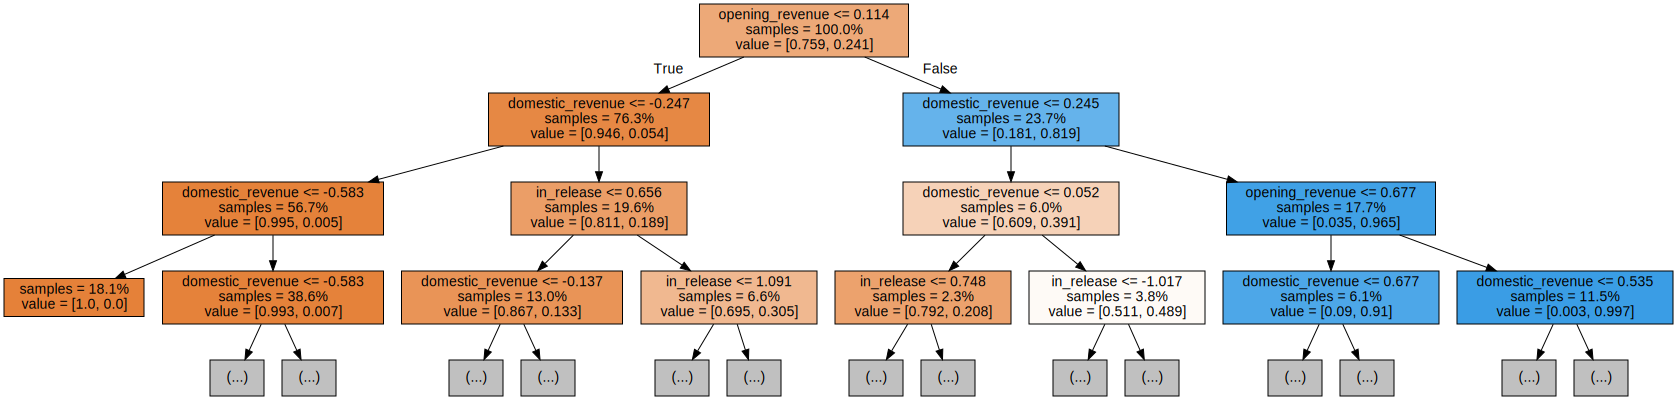

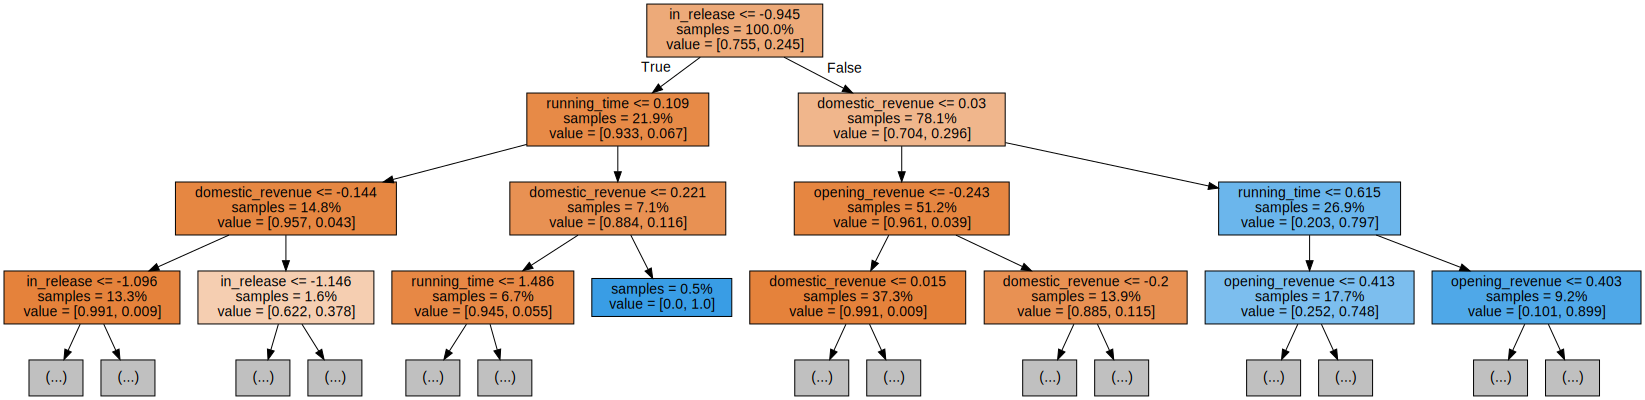

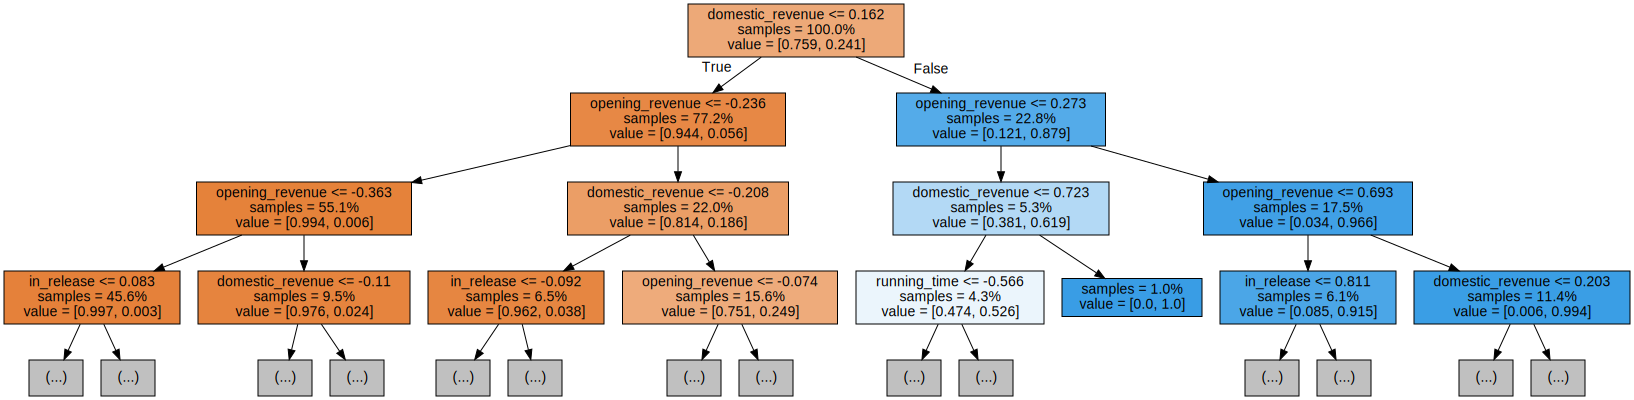

In [225]:
for i in range(3):
    tree = classifier.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=X.columns,  
                               filled=True,  
                               max_depth=3, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

In [226]:
from sklearn.model_selection import GridSearchCV

# Create a Random Forest Classifier
classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.9292717086834734
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      1062
           1       0.90      0.82      0.86       366

    accuracy                           0.93      1428
   macro avg       0.92      0.89      0.90      1428
weighted avg       0.93      0.93      0.93      1428



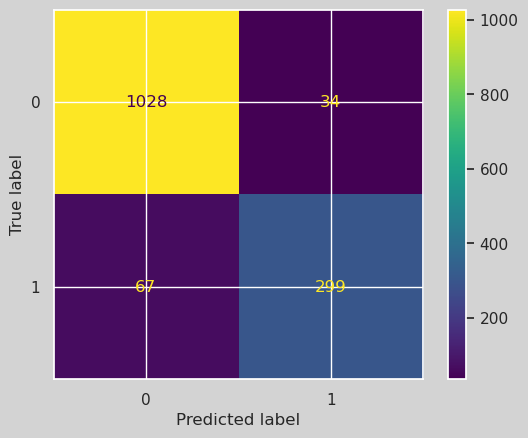

In [211]:
# Generate predictions with the best model
y_pred = best_classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [212]:
y_pred = best_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9292717086834734
Precision: 0.8978978978978979
Recall: 0.8169398907103825


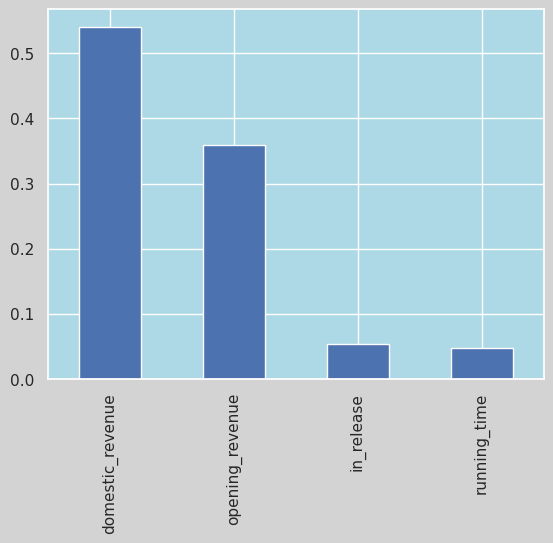

In [213]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(best_classifier.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar();

https://www.datacamp.com/tutorial/random-forests-classifier-python

In [230]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
copy_df = movies_df.copy()
copy_df['label'] = copy_df['world_revenue'].apply(lambda x: 1 if x > threshold else 0)
# Xác định đặc trưng (X) và nhãn (y) sau khi one-hot encoding
X = copy_df.drop(['world_revenue','label', 'genres','distributor','title','MPAA','release_date'], axis=1)
y = copy_df['label']
#X = movies_df[['domestic_revenue', 'opening_revenue', 'running_time','in_release']]
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.9124649859943977
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      1062
           1       0.87      0.78      0.82       366

    accuracy                           0.91      1428
   macro avg       0.90      0.87      0.88      1428
weighted avg       0.91      0.91      0.91      1428



In [240]:
k_values = [i for i in range (1,100)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

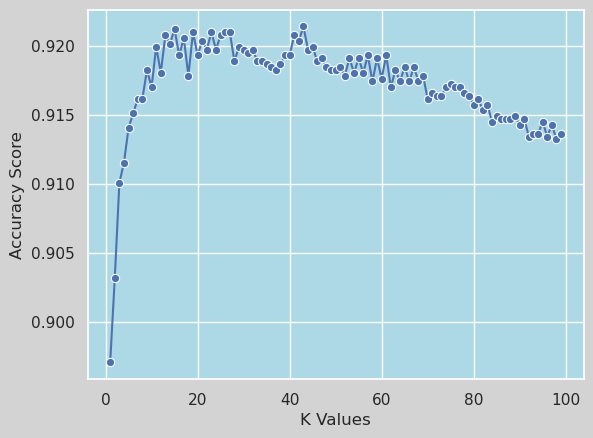

In [241]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [242]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=43)

In [243]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.9257703081232493
Precision: 0.9333333333333333
Recall: 0.7650273224043715
